### Imports

In [1]:
#import all needed modules
from scipy.io import arff
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_validate
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV


### 1. Reading data

In [2]:
#Importing and reading data
data = arff.loadarff('dataset/Training Dataset.arff')
df = pd.DataFrame(data[0])
columns = df.columns.values
for col in columns:
    df[col] = pd.to_numeric(df[col])
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


### 2. Basic data information

In [ ]:
df.shape

(11055, 31)

As seen from the output above our data has 11055 examples and 31 features

In [ ]:
df.columns.values

array(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain',
       'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index',
       'Links_pointing_to_page', 'Statistical_report', 'Result'],
      dtype=object)

List of all features

Feature interpretation:
 - having_IP_Address - IP address is used as an alternative of the domain name in the URL
 - URL_Length - If the length of the URL is greater than or equal 54 characters then the URL classified as phishing
 - Shortining_Service - URL shortening is a method in which a URL may be made considerably smaller in length and still lead to the required webpage.
 - having_At_Symbol - Using “@” symbol in the URL
 - double_slash_redirecting - The existence of “//” within the URL path means that the user will be redirected to another website. 
 - Prefix_Suffix - The dash symbol is rarely used in legitimate URLs. 
 - having_Sub_Domain - A domain name might include the country-code top-level domains (ccTLD)
 - SSLfinal_State - The existence of HTTPS is very important in giving the impression of website legitimacy
 - Domain_registeration_length - Phishing website lives for a short period of time, trustworthy domains are regularly paid for several years in advance 
 - Favicon - If the favicon is loaded from a domain other than that shown in the address bar, then the webpage is likely to be considered a Phishing attempt
 - port - If all ports are open, phishers can run almost any service they want and as a result, user information is threatened.
 - HTTPS_token - The phishers may add the “HTTPS” token to the domain part of a URL in order to trick users
 - Request_URL - Request URL examines whether the external objects contained within a webpage such as images, videos or sounds are loaded from another domain.
 - URL_of_Anchor - An anchor is an element defined by the anchor tag. This feature is treated exactly as “Request URL”. 
 - Links_in_tags - Links in Meta, Script and Link tags. It is expected that these tags are linked to the same domain of the webpage
 - SFH - SFHs that contain an empty string or “about:blank” are considered doubtful because an action should be taken upon the submitted information
 - Submitting_to_email - A phisher might redirect the user’s information to his personal email
 - Abnormal_URL - For a legitimate website, identity is typically part of its URL.
 - Redirect - that legitimate websites have been redirected one time max. On the other hand, phishing websites containing this feature have been redirected at least 4 times.
 - on_mouseover - Phishers may use JavaScript to show a fake URL in the status bar to users. 
 - RightClick - Phishers use JavaScript to disable the right-click function, so that users cannot view and save the webpage source code
 - popUpWindow - It is unusual to find a legitimate website asking users to submit their personal information through a pop-up window
 - Iframe - Phishers can make use of the “iframe” tag and make it invisible i.e. without frame borders
 - age_of_domain - Most phishing websites live for a short period of time. 
 - DNSRecord - If the DNS record is empty or not found then the website is classified as “Phishing”, otherwise it is classified as “Legitimate”. 
 - web_traffic - This feature measures the popularity of the website by determining the number of visitors and the number of pages they visit
 - Page_Rank - PageRank aims to measure how important a webpage is on the Internet. 
 - Google_Index - This feature examines whether a website is in Google’s index or not. 
 - Links_pointing_to_page - The number of links pointing to the webpage indicates its legitimacy level
 - Statistical_report - Several parties such as PhishTank , and StopBadware  formulate numerous statistical reports on phishing websites at every given period of time
 - Result - target class -> 1 if website is not a phising website, -1 if otherwise

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

All of our data is of type integer and there is no null data present for each feature

#### Missing data

Our dataset does not have missing data

In [ ]:
df.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

#### Monotone attributes

Our dataset doesnt have monotone attributes as shown below

In [ ]:
df.nunique()

having_IP_Address              2
URL_Length                     3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  2
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    2
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            3
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  2
DNSRecord                      2
web_traffic                    3
Page_Rank                      2
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

In [ ]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Data visualization

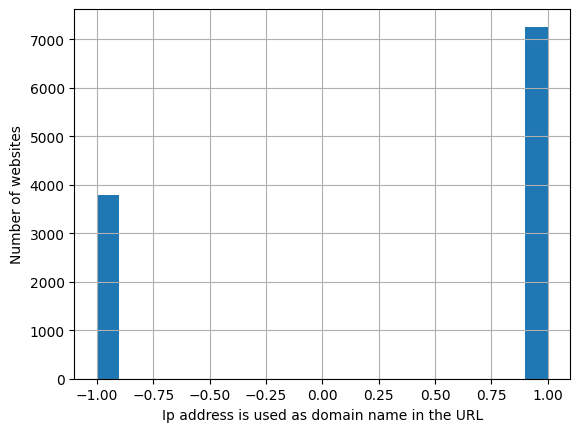

In [ ]:
plt.hist(df.having_IP_Address,bins=20)
plt.grid()
plt.xlabel("Ip address is used as domain name in the URL")
plt.ylabel("Number of websites")
plt.show()

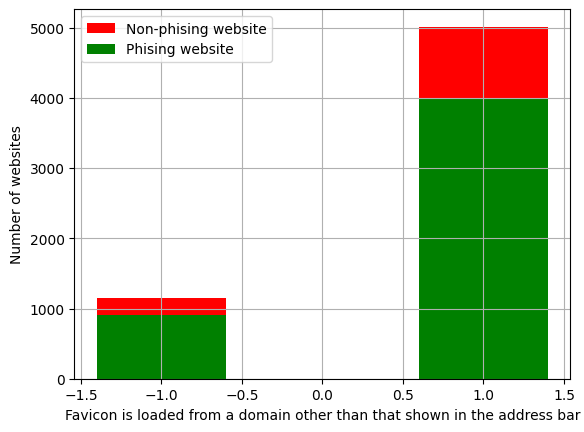

In [ ]:

count_per_Favicon_isPhising = df.loc[df.Result == 1,:].groupby('Favicon').count().loc[:,'having_IP_Address'].values
count_per_Favicon_isNotPhising = df.loc[df.Result == -1,:].groupby('Favicon').count().loc[:,'having_IP_Address'].values
title_name = df.groupby('Favicon').count().index.values
# plot
plt.bar(title_name, count_per_Favicon_isPhising, color='red', label='Non-phising website')
plt.bar(title_name, count_per_Favicon_isNotPhising, color='green', label='Phising website')
plt.legend(loc='best')
plt.grid()
plt.xlabel("Favicon is loaded from a domain other than that shown in the address bar")
plt.ylabel("Number of websites")
plt.show()


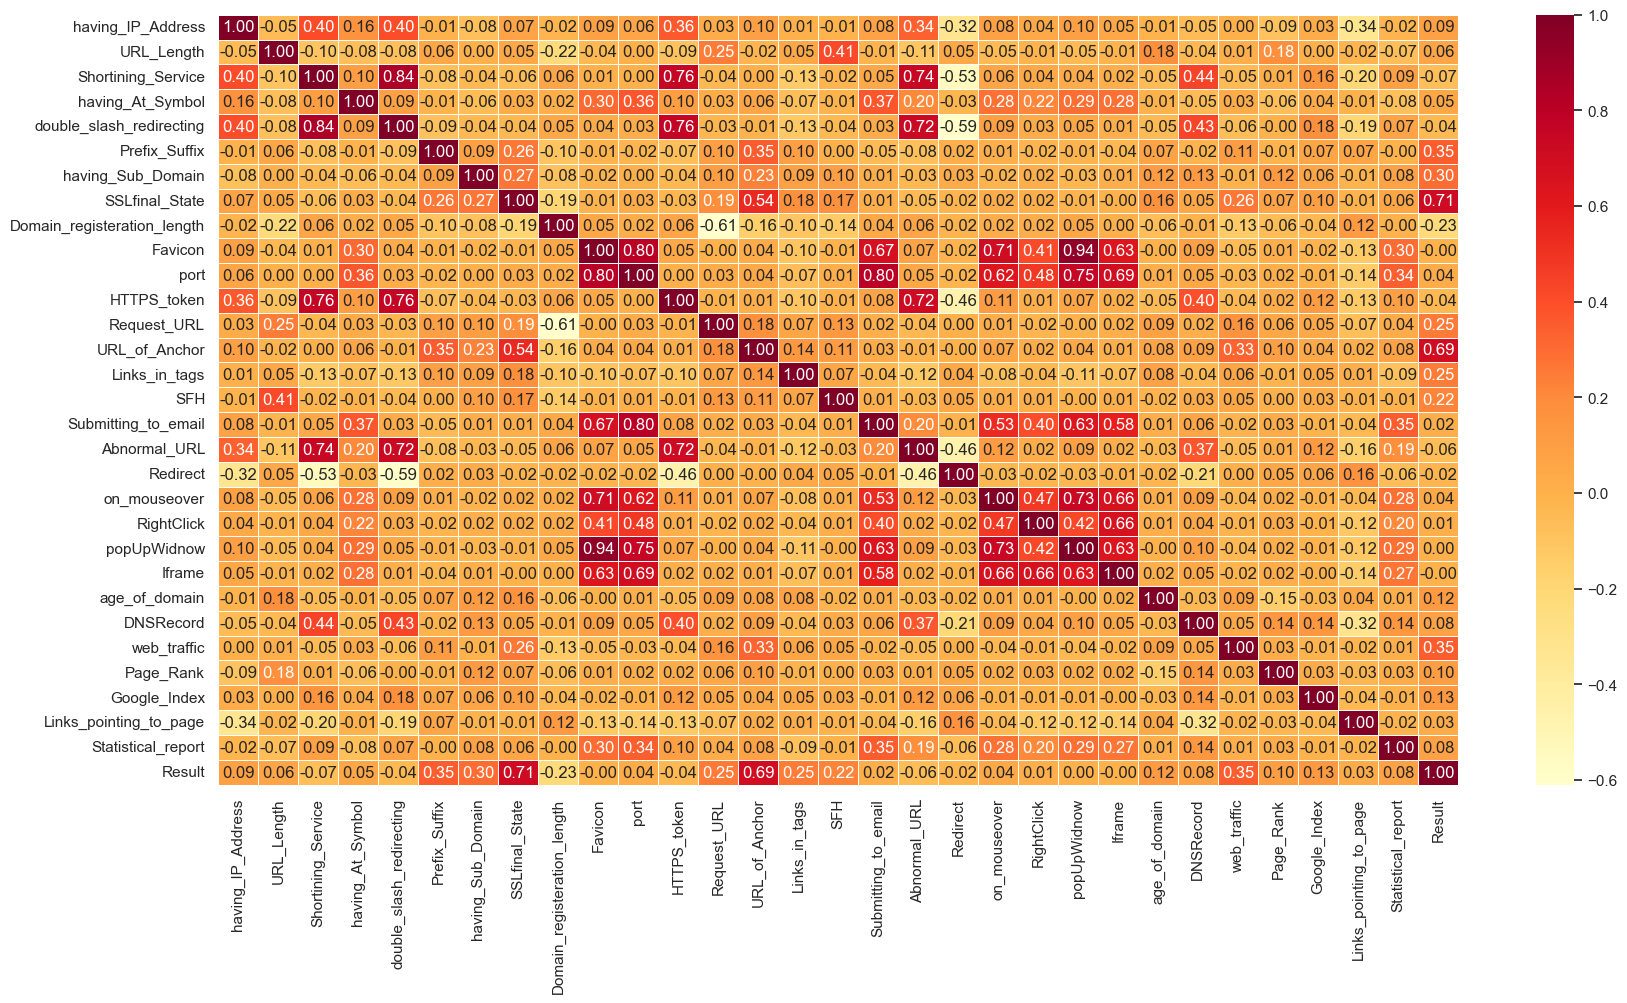

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlOrRd", linewidths=.5)
plt.show()

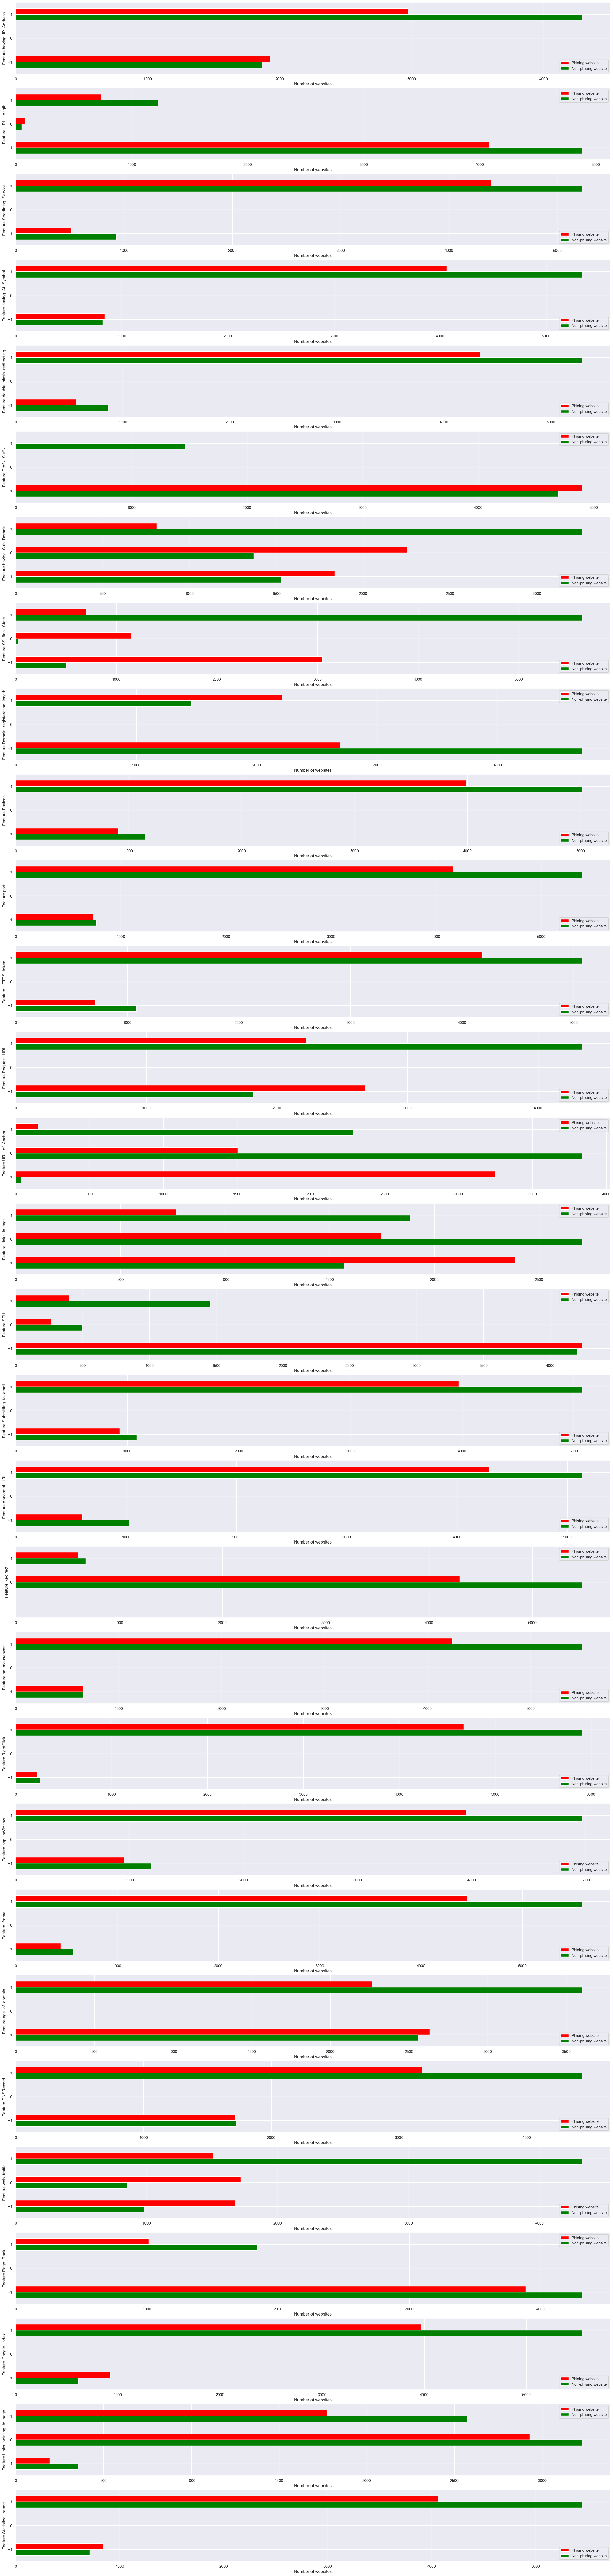

In [ ]:
fig, ax = plt.subplots(30,1, figsize=(30,130))
features = df.columns.values[:-1]
for idx, feature in enumerate(features):
    Result_1_for_feature = df.loc[df.Result == 1,:].groupby(feature).count().loc[:,'Result'].values
    Result_0_for_feature = df.loc[df.Result == -1,:].groupby(feature).count().loc[:,'Result'].values
    if len(Result_0_for_feature) == 1:
        Result_0_for_feature = np.append(Result_0_for_feature,np.array(0))

    y_title_name = df.groupby(feature).count().index.values

    for jdx,title_name in enumerate(y_title_name):
        if jdx == 0:
            ax[idx].barh(title_name+0.25/2, Result_0_for_feature[jdx], color='red',height=0.25,label="Phising website")
            ax[idx].barh(title_name-0.25/2, Result_1_for_feature[jdx], color='green',height=0.25,label="Non-phising website")
        else:
            ax[idx].barh(title_name+0.25/2, Result_0_for_feature[jdx], color='red',height=0.25)
            ax[idx].barh(title_name-0.25/2, Result_1_for_feature[jdx], color='green',height=0.25)
    ax[idx].legend(loc='best')
    ax[idx].set_ylabel("Feature " + feature)
    ax[idx].set_xlabel("Number of websites")
    ax[idx].set_yticks(np.arange(min(y_title_name), max(y_title_name)+1, 1.0))
    ax[idx].set_ylim(-1.5, 1.5)
plt.show()

### 4. Result replication

Accuracy measument functions

True positive rate: <br> $$TPR = \frac{TP}{TP + FN}$$

True negative rate: <br> $$TNR = \frac{TN}{TN + FP}$$

Geometric mean: <br> $$GM = \sqrt{TNR*TNR} $$

In [3]:
def true_positive_rate(y_true, y_pred):

    # false negative
    fn = ((y_pred == -1) & (y_true == 1)).sum()

    # true positive
    tp = ((y_pred == 1) & (y_true == 1)).sum()

    # false positive rate
    return tp / (tp + fn)

def true_negative_rate(y_true, y_pred):

    # false positive
    fp = ((y_pred == 1) & (y_true == -1)).sum()

    # true negative
    tn = ((y_pred == -1) & (y_true == -1)).sum()

    # false positive rate
    return tn / (tn + fp)

def geometric_mean(true_positive_rate, true_negative_rate):
    result = list()
    for i1, i2 in zip(true_positive_rate, true_negative_rate):
        result.append(np.sqrt(i1*i2))
    return result
    
scoring = {
    'true_negative_rate': metrics.make_scorer(true_negative_rate),
    'true_positive_rate': metrics.make_scorer(true_positive_rate),
}

Function for initializing classifiers

In [ ]:
def initializeClassifiers(pca = False):
    if pca == True:
        GNC = GaussianNB()
    else:
        GNC = CategoricalNB()
    KNN = KNeighborsClassifier(n_neighbors=1)    
    BPNN = MLPClassifier()
    SVM = SVC(probability=True)
    DTC = DecisionTreeClassifier()
    RF = RandomForestClassifier()
    return list([KNN, BPNN, SVM, GNC, DTC, RF])


In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
y = df.loc[:,"Result"]
X = df.drop(["Result"], axis = 1)
columns_names = X.columns
X = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X, columns = columns_names)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)


Selecting features with wrapper feature selection for each classifier.

Five-fold  cross  validation  was  implemented 
using SequentialFeatureSelector in order to evaluate the performances of 
machine  learning  classifiers  with  the  wrapper-based  features 
selection in phishing websites detection.

In [ ]:
classifiers = initializeClassifiers()

sfs_selected_features = list()

for classifier in classifiers:
    sfs1 = SFS(classifier, 
            k_features=(15,30), 
            forward=False, 
            floating=False, 
            verbose=1,
            scoring='accuracy',
            cv=5,
            n_jobs=-1)
    sfs1 = sfs1.fit(X_train, y_train)
    sfs_selected_features.append(sfs1)
print(sfs_selected_features)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   16.5s finished
Features: 29/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    9.4s finished
Features: 28/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   10.5s finished
Features: 27/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    7.7s finished
Features: 26/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    6.5s finished
Features: 25/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.8s finished
Features: 24/15[Parallel(n_jobs=-1)]: Using

[SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=1),
                          forward=False, k_features=(15, 30), n_jobs=-1,
                          scoring='accuracy', verbose=1), SequentialFeatureSelector(estimator=MLPClassifier(), forward=False,
                          k_features=(15, 30), n_jobs=-1, scoring='accuracy',
                          verbose=1), SequentialFeatureSelector(estimator=SVC(), forward=False, k_features=(15, 30),
                          n_jobs=-1, scoring='accuracy', verbose=1), SequentialFeatureSelector(estimator=CategoricalNB(), forward=False,
                          k_features=(15, 30), n_jobs=-1, scoring='accuracy',
                          verbose=1), SequentialFeatureSelector(estimator=DecisionTreeClassifier(), forward=False,
                          k_features=(15, 30), n_jobs=-1, scoring='accuracy',
                          verbose=1), SequentialFeatureSelector(estimator=RandomForestClassifier(), forward=False,
         

Getting accuracy scores for all classifiers using wrapper based feature selection

Plotting ROC curves for each classifier 

C:\Users\matij\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


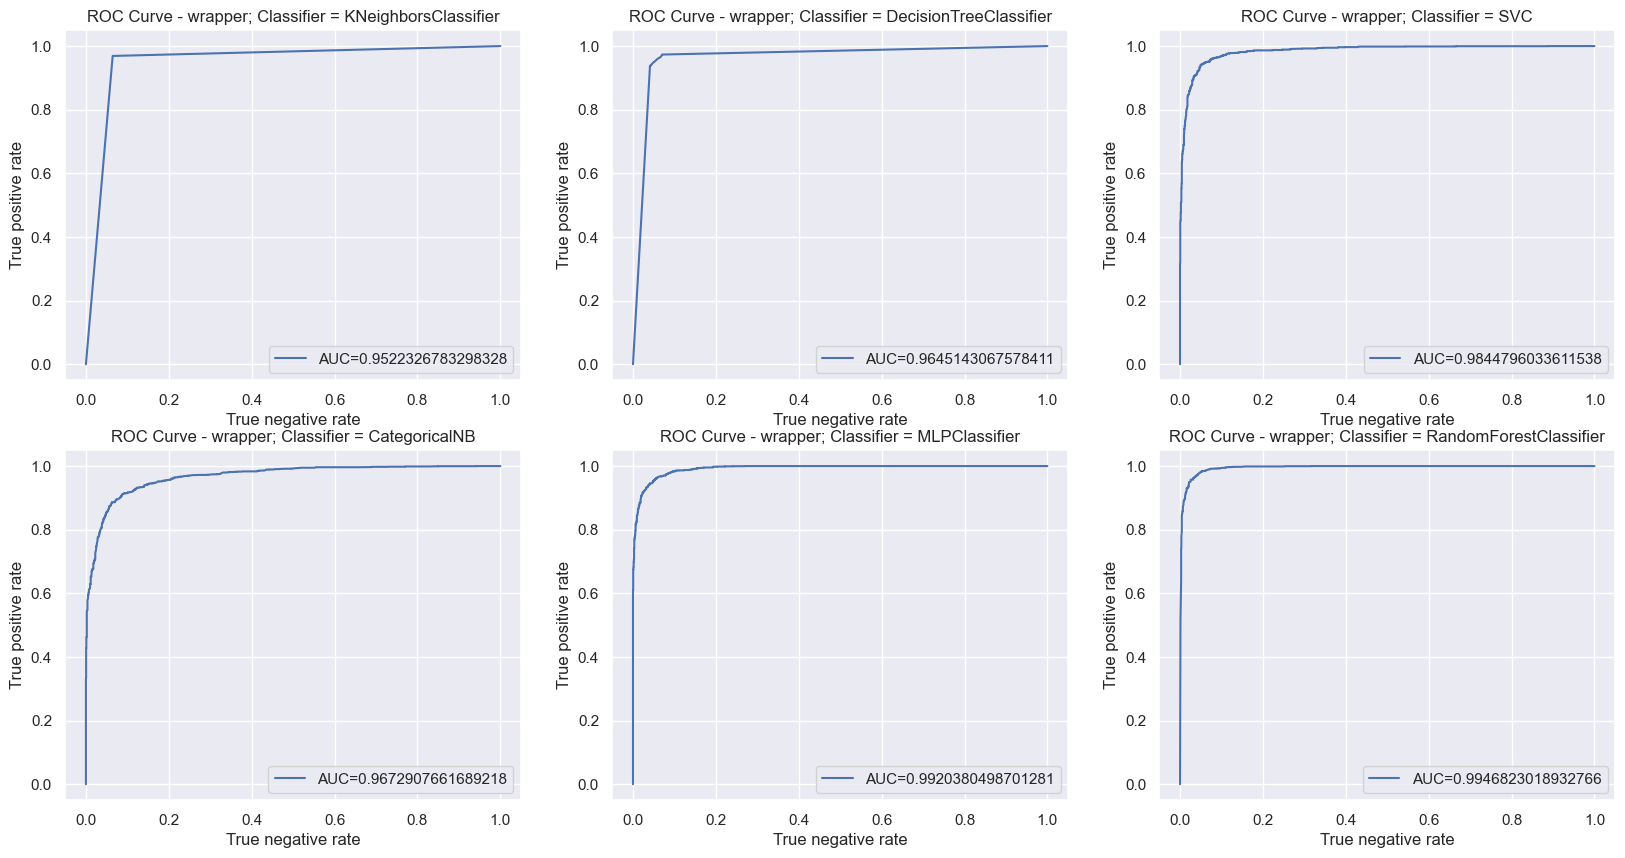

In [ ]:
accuracy_scores_sfs = list()
TPR_sfs = list()
TNR_sfs = list()
GM_sfs = list()
fig, axs = plt.subplots(2, 3)
for idx, sfs_selected_feature in enumerate(sfs_selected_features):
    X_train_sfs = sfs_selected_feature.transform(X_train)
    X_test_sfs = sfs_selected_feature.transform(X_test)
    classifiers[idx].fit(X_train_sfs,y_train)
    y_pred = classifiers[idx].predict(X_test_sfs)
    accuracy_scores_sfs.append(metrics.accuracy_score(y_test,y_pred))
    TPR_sfs.append(true_positive_rate(y_pred,y_test))
    TNR_sfs.append(true_negative_rate(y_pred,y_test))
    y_pred_proba = classifiers[idx].predict_proba(X_test_sfs)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    axs[idx%2,idx%3].plot(fpr,tpr, label = "AUC="+str(auc))
    axs[idx%2,idx%3].legend(loc="best")
    axs[idx%2,idx%3].title.set_text("ROC Curve - wrapper; Classifier = " + classifiers[idx].__class__.__name__)
    axs[idx%2,idx%3].set(xlabel='True negative rate', ylabel='True positive rate')
plt.show()

GM_sfs = geometric_mean(TPR_sfs,TNR_sfs)


Getting accuracy scores for all classifiers without feature selection

Plotting ROC curves for each classifier 

C:\Users\matij\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


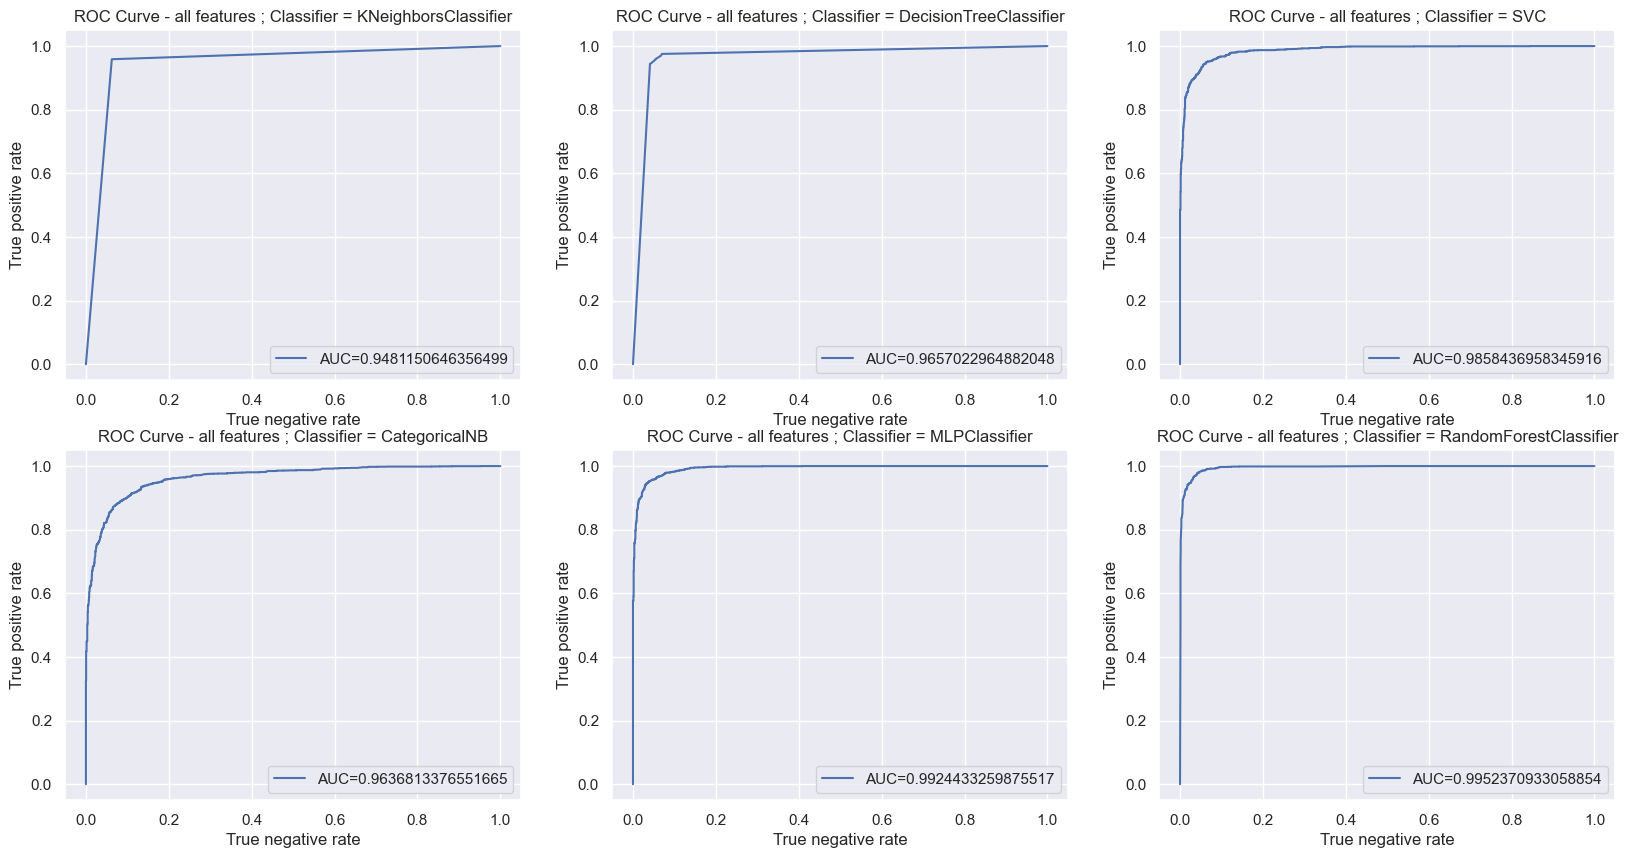

In [ ]:
accuracy_scores_all_features = list()
fig, axs = plt.subplots(2, 3)
TPR_all = list()
TNR_all = list()
GM_all = list()
classifiers_all_features = initializeClassifiers()
for idx, classifier in enumerate(classifiers_all_features):
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy_scores_all_features.append(metrics.accuracy_score(y_test,y_pred))
    TPR_all.append(true_positive_rate(y_pred,y_test))
    TNR_all.append(true_negative_rate(y_pred,y_test))
    y_pred_proba = classifiers_all_features[idx].predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    axs[idx%2,idx%3].plot(fpr,tpr, label = "AUC="+str(auc))
    axs[idx%2,idx%3].legend(loc="best")
    axs[idx%2,idx%3].title.set_text("ROC Curve - all features ; Classifier = " + classifiers[idx].__class__.__name__)
    axs[idx%2,idx%3].set(xlabel='True negative rate', ylabel='True positive rate')
    
plt.show()
    
GM_all = geometric_mean(TPR_all,TNR_all)

Getting accuracy scores for all classifiers using information gain feature selection

C:\Users\matij\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


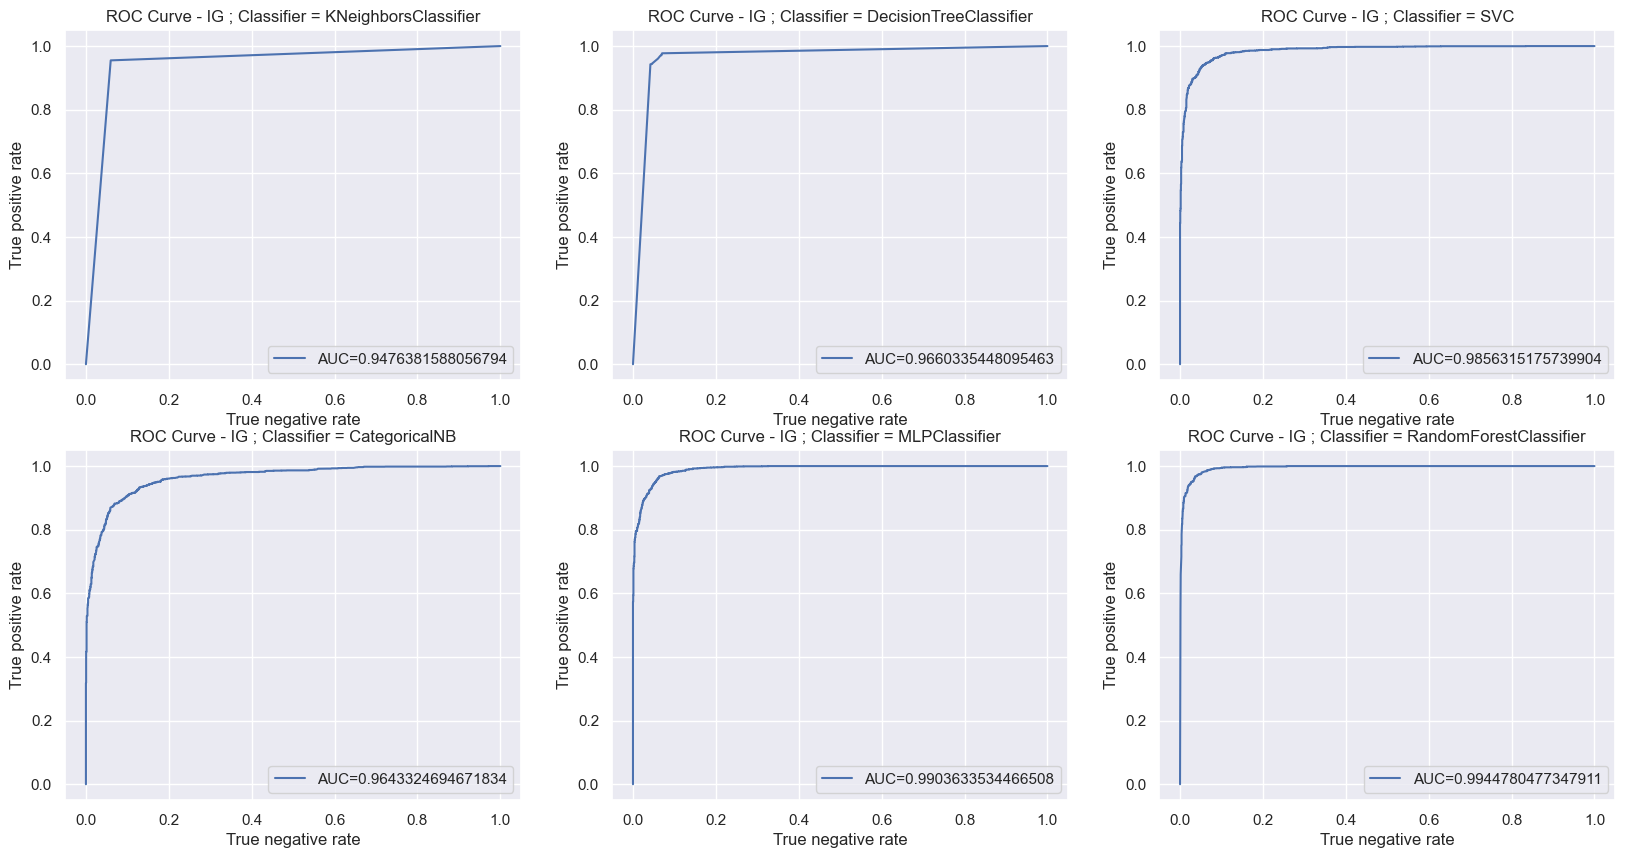

In [ ]:
accuracy_scores_IG = list()
classifiers_IG = initializeClassifiers()
TPR_IG = list()
TNR_IG = list()
GM_IG = list()
fig, axs = plt.subplots(2, 3)
sel_five_cols = SelectKBest(mutual_info_classif, k=25)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]
X_train_ig = X_train.loc[:, X_train.columns[sel_five_cols.get_support()]]
X_test_ig =X_test.loc[:, X_test.columns[sel_five_cols.get_support()]]
for idx, classifier in enumerate(classifiers_IG):
    classifier.fit(X_train_ig,y_train)
    y_pred = classifier.predict(X_test_ig)
    accuracy_scores_IG.append(metrics.accuracy_score(y_test,y_pred))
    TPR_IG.append(true_positive_rate(y_pred,y_test))
    TNR_IG.append(true_negative_rate(y_pred,y_test))
    y_pred_proba = classifiers_IG[idx].predict_proba(X_test_ig)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    axs[idx%2,idx%3].plot(fpr,tpr, label = "AUC="+str(auc))
    axs[idx%2,idx%3].legend(loc="best")
    axs[idx%2,idx%3].title.set_text("ROC Curve - IG ; Classifier = " + classifiers[idx].__class__.__name__)
    axs[idx%2,idx%3].set(xlabel='True negative rate', ylabel='True positive rate')
    
plt.show()
    
GM_IG = geometric_mean(TPR_IG,TNR_IG)

Getting accuracy scores for all classifiers using PCA feature selection

C:\Users\matij\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


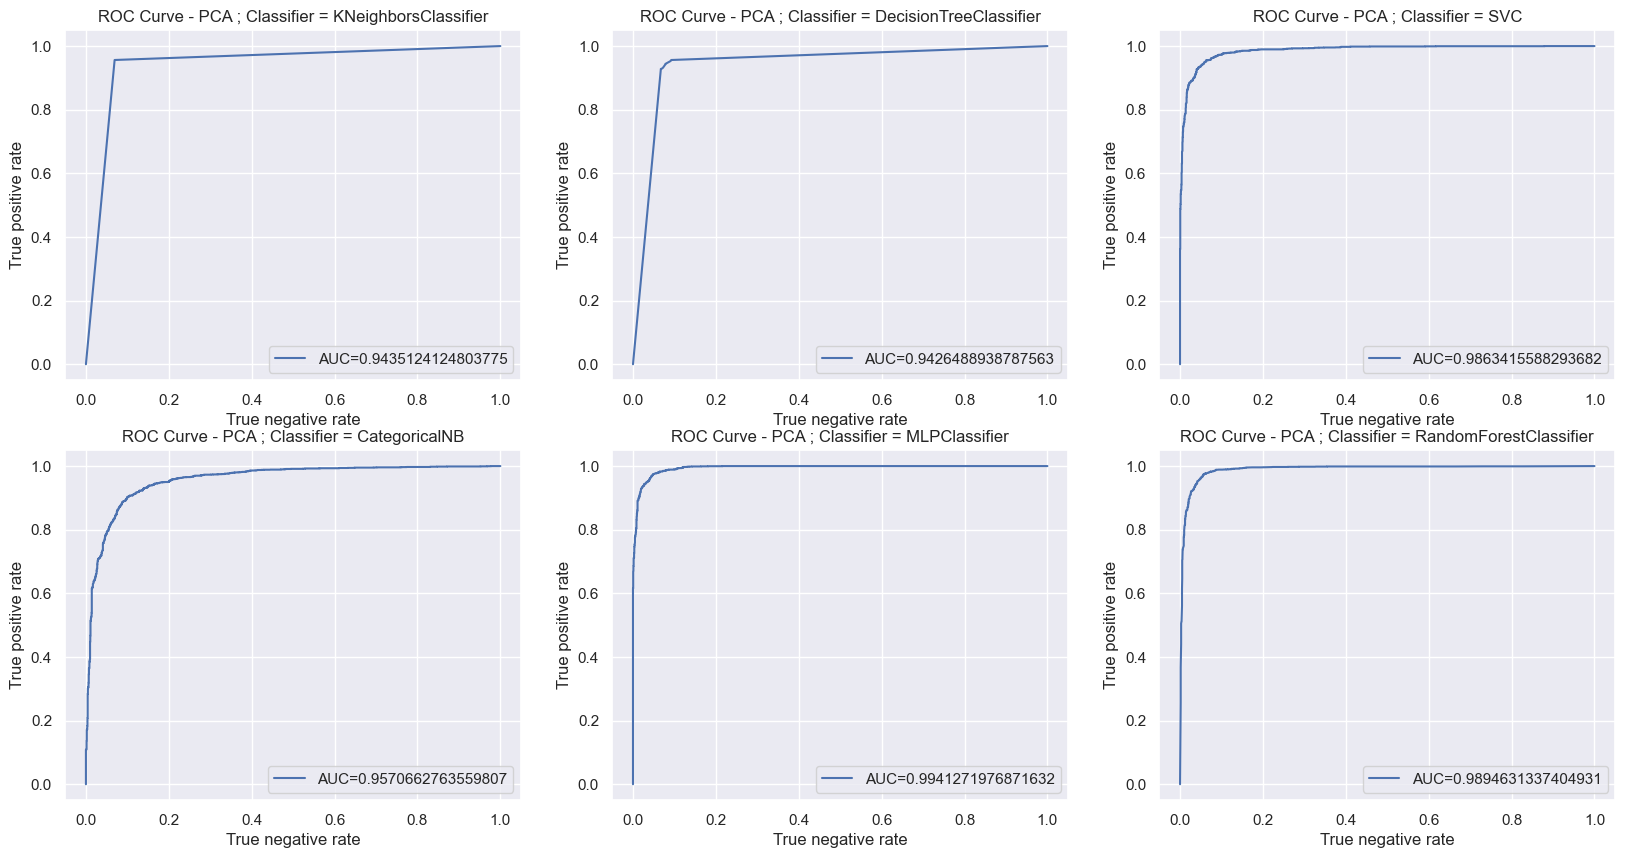

In [ ]:

TPR_PCA = list()
TNR_PCA = list()
GM_PCA = list()
accuracy_scores_PCA = list()
fig, axs = plt.subplots(2, 3)
classifiers_PCA = initializeClassifiers(pca=True)
pca = PCA(n_components = 25)
pca.fit(X_train)
for idx, classifier in enumerate(classifiers_PCA):
    classifier.fit(pca.transform(X_train),y_train)
    y_pred = classifier.predict(pca.transform(X_test))
    accuracy_scores_PCA.append(metrics.accuracy_score(y_test,y_pred))
    TPR_PCA.append(true_positive_rate(y_pred,y_test))
    TNR_PCA.append(true_negative_rate(y_pred,y_test))
    y_pred_proba = classifiers_PCA[idx].predict_proba(pca.transform(X_test))[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    axs[idx%2,idx%3].plot(fpr,tpr, label = "AUC="+str(auc))
    axs[idx%2,idx%3].legend(loc="best")
    axs[idx%2,idx%3].title.set_text("ROC Curve - PCA ; Classifier = " + classifiers[idx].__class__.__name__)
    axs[idx%2,idx%3].set(xlabel='True negative rate', ylabel='True positive rate')
    
plt.show()
    
GM_PCA = geometric_mean(TPR_PCA,TNR_PCA)

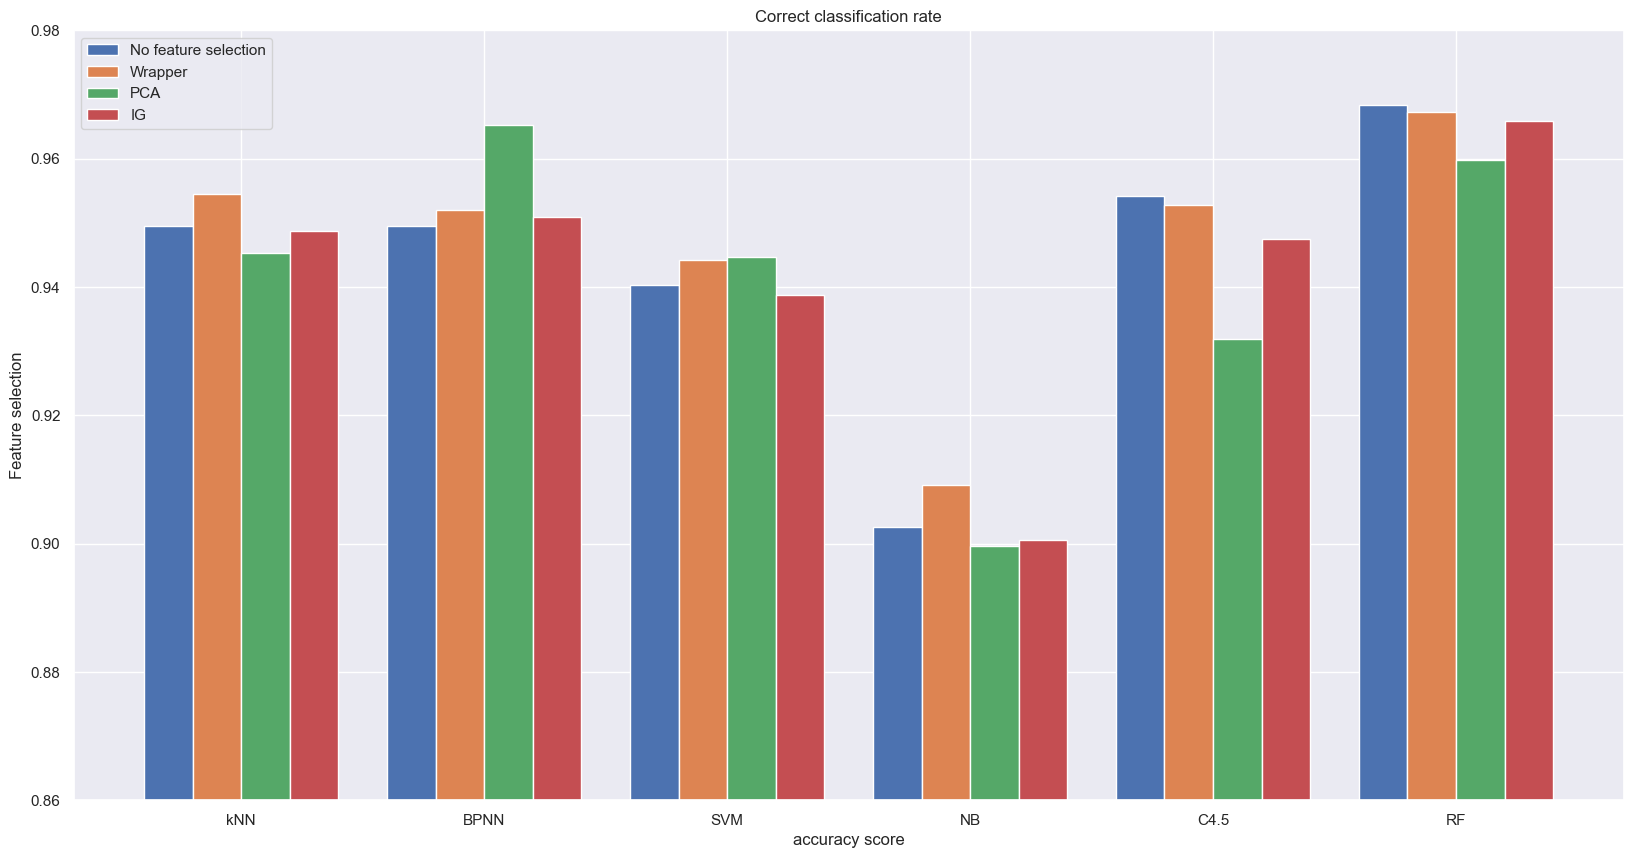

In [ ]:
classifiers_names = ['kNN','BPNN','SVM','NB','C4.5','RF']
X_axis = np.arange(len(classifiers_names))
plt.bar(X_axis - 0.3, accuracy_scores_all_features, 0.2, label = 'No feature selection')
plt.bar(X_axis - 0.1, accuracy_scores_sfs, 0.2, label = 'Wrapper')
plt.bar(X_axis + 0.1, accuracy_scores_PCA, 0.2, label = 'PCA')
plt.bar(X_axis + 0.3, accuracy_scores_IG, 0.2, label = 'IG')
  
plt.xticks(X_axis, classifiers_names)
plt.xlabel("accuracy score")
plt.ylabel("Feature selection")
plt.title("Correct classification rate")
plt.legend()
plt.ylim(0.86,0.98)
plt.show()

In [ ]:
headers = ['Measures','Without feature selection', 'Wrapper', 'PCA', 'IG']
idx = list()
for classifier in classifiers_names:
    idx.append(classifier)
    idx.append(classifier)
    idx.append(classifier)
table = []
table.append(headers)
for i in range(0,len(classifiers)):
    for j in range(0,3):
        row = list()
        if j == 0:
            row.append('TPR')
            row.append(TPR_all[i])
            row.append(TPR_sfs[i])
            row.append(TPR_PCA[i])
            row.append(TPR_IG[i])
        if j == 1:
            row.append('TNR')
            row.append(TNR_all[i])
            row.append(TNR_sfs[i])
            row.append(TNR_PCA[i])
            row.append(TNR_IG[i])
        if j == 2:
            row.append('GM')
            row.append(GM_all[i])
            row.append(GM_sfs[i])
            row.append(GM_PCA[i])
            row.append(GM_IG[i])
        table.append(row)
print(tabulate(table, headers = "firstrow",showindex = idx))


      Measures      Without feature selection    Wrapper       PCA        IG
----  ----------  ---------------------------  ---------  --------  --------
kNN   TPR                            0.952983   0.951972  0.950872  0.951066
kNN   TNR                            0.945003   0.958087  0.938883  0.943856
kNN   GM                             0.948984   0.955025  0.944858  0.947454
BPNN  TPR                            0.941583   0.949825  0.959071  0.948316
BPNN  TNR                            0.963736   0.960022  0.958001  0.949679
BPNN  GM                             0.952595   0.95491   0.958536  0.948997
SVM   TPR                            0.941915   0.943684  0.945232  0.943552
SVM   TNR                            0.9381     0.944772  0.937898  0.941742
SVM   GM                             0.940006   0.944228  0.941558  0.942647
NB    TPR                            0.918507   0.924498  0.899578  0.921434
NB    TNR                            0.881926   0.889234  0.906784  0.881959

# Poboljšanje rezultata

In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
y = df.loc[:,"Result"]
X = df.drop(["Result"], axis = 1)
columns_names = X.columns
X = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X, columns = columns_names)



X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)


### Dodavanje novih klasifikatora i opsežnijeg grid searcha
Dodani ADABoost, LDA, hard i soft voting klasifikatori. Za sve modele izvršava se grid search za optimizaciju hiperparametara.

In [5]:
def initializeClassifiers(pca = False):
    if pca == True:
        GNC = GaussianNB()
    else:
        GNC = CategoricalNB()
    KNN = KNeighborsClassifier(n_neighbors=1)    
    BPNN = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=100)
    SVM = SVC(probability=True)
    DTC = DecisionTreeClassifier()
    RF = RandomForestClassifier()
    ADA_BOOST = AdaBoostClassifier()
    LDA = LinearDiscriminantAnalysis()
    VOTING_HARD = VotingClassifier(estimators=[('knn', KNN), ('bpnn', BPNN),  ('rf', RF)], voting="hard")
    VOTING_SOFT = VotingClassifier(estimators=[('knn', KNN), ('bpnn', BPNN),  ('rf', RF)], voting="soft")
    return list([KNN, SVM, GNC, BPNN, DTC, RF, ADA_BOOST, LDA, VOTING_HARD, VOTING_SOFT])

grid_search_params = {
    "GaussianNB" : {},
    "CategoricalNB" : {},
    "KNeighborsClassifier": {"n_neighbors": [i for i in range(1, 11)], "weights": ["uniform", "distance"]},
    "MLPClassifier": {"hidden_layer_sizes": [(10, 10, 10), (10, 10, 10, 10)], "activation": ["relu", "logistic", "tanh"], "solver":["lbfgs", "sgd", "adam"], "learning_rate":["constant", "adaptive"]},
    "SVC": {"C": [i for i in range(1, 101, 10)], "kernel":["linear", "poly", "rbf"]},
    "DecisionTreeClassifier": {"criterion": ["gini", "entropy"], "max_depth": [i for i in range(1, 15)]},
    "RandomForestClassifier": {"n_estimators": [i for i in range(10, 101, 10)], "criterion": ["gini", "entropy"], "max_depth": [i for i in range(1, 15)]},
    "AdaBoostClassifier": {"n_estimators": [i for i in range(10, 101, 10)], "learning_rate": [0.1 * i for i in range(1, 11)]},
    "LinearDiscriminantAnalysis": {"solver":["svd", "lsqr", "eigen"]}
}

### Promijenjena metrika ocjenjivanja odabranih značajki

Prilikom odabira značajki koje će se koristiti kao ulaz u model, izvorno se koristila točnost za vrednovanje podskupa značajki, no to je promjenjeno u f1-mjeru. 

In [6]:
classifiers = initializeClassifiers()

sfs_selected_features = list()

for classifier in classifiers:
    sfs1 = SFS(classifier, 
            k_features=(20,30), 
            forward=False, 
            floating=False, 
            verbose=0,
            scoring='f1',
            cv=5,
            n_jobs=-1)
    sfs1 = sfs1.fit(X_train, y_train)
    print(classifier.__class__.__name__)
    print(sfs1.k_feature_names_)
    print()
    sfs_selected_features.append(sfs1)



KNeighborsClassifier
('URL_Length', 'Shortining_Service', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'popUpWidnow', 'age_of_domain', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page')

SVC
('having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report')

CategoricalNB
('having_IP_Address', 'URL_Length', 'Shortining_Service', 'Prefix_Suffix', 'having_Sub_Domain', 'SSL

c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached a

MLPClassifier
('having_IP_Address', 'URL_Length', 'Shortining_Service', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'HTTPS_token', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Redirect', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report')

DecisionTreeClassifier
('having_IP_Address', 'URL_Length', 'Shortining_Service', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Links_pointing_to_page')

RandomForestClassifier
('having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'po

c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached a

VotingClassifier
('having_IP_Address', 'URL_Length', 'Shortining_Service', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page')



c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached a

VotingClassifier
('having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report')



### Nova metoda odabira značajki
Za odabir značajki dodana je metoda bazirana na hi kvadrat testu. Navedena metoda odabire značajke koje imaju visoku zavisnost s ciljnom varijablom.

In [7]:

chi_selected_features = list()

for classifier in classifiers:
    chi1 = SelectKBest(score_func=chi2, k=25)
    chi1 = chi1.fit(X_train, y_train)
    chi_selected_features.append(chi1)

print(chi_selected_features[0].get_feature_names_out())

['having_IP_Address' 'URL_Length' 'Shortining_Service' 'having_At_Symbol'
 'double_slash_redirecting' 'Prefix_Suffix' 'having_Sub_Domain'
 'SSLfinal_State' 'Domain_registeration_length' 'port' 'HTTPS_token'
 'Request_URL' 'URL_of_Anchor' 'Links_in_tags' 'SFH' 'Abnormal_URL'
 'Redirect' 'on_mouseover' 'age_of_domain' 'DNSRecord' 'web_traffic'
 'Page_Rank' 'Google_Index' 'Links_pointing_to_page' 'Statistical_report']


In [8]:
accuracy_scores_sfs = list()
TPR_sfs = list()
TNR_sfs = list()
GM_sfs = list()
for idx, sfs_selected_feature in enumerate(sfs_selected_features):
    print(classifiers[idx].__class__.__name__)
    if(idx == len(sfs_selected_features) - 1):
        classifiers[idx] = VotingClassifier(estimators=[("knn", classifiers[0]), ("bpnn", classifiers[3]), ("svc", classifiers[5])], voting="hard")
    elif (idx == len(sfs_selected_features) - 2):
        classifiers[idx] = VotingClassifier(estimators=[("knn", classifiers[0]), ("bpnn", classifiers[3]), ("svc", classifiers[5])], voting="soft")
    else:
        parameters = grid_search_params[classifiers[idx].__class__.__name__]
        grid_search_estimator = GridSearchCV(classifiers[idx], param_grid=parameters, n_jobs=-1)
        grid_search_estimator.fit(X_train, y_train)
        classifiers[idx] = grid_search_estimator.best_estimator_

    X_train_sfs = sfs_selected_feature.transform(X_train)
    X_test_sfs = sfs_selected_feature.transform(X_test)
    classifiers[idx].fit(X_train_sfs,y_train)
    y_pred = classifiers[idx].predict(X_test_sfs)
    accuracy_scores_sfs.append(metrics.accuracy_score(y_test,y_pred))
    TPR_sfs.append(true_positive_rate(y_pred,y_test))
    TNR_sfs.append(true_negative_rate(y_pred,y_test))
    #y_pred_proba = classifiers[idx].predict_proba(X_test_sfs)[::,1]


GM_sfs = geometric_mean(TPR_sfs,TNR_sfs)

KNeighborsClassifier
SVC
CategoricalNB
MLPClassifier


c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
LinearDiscriminantAnalysis
VotingClassifier


c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


VotingClassifier


c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [9]:
accuracy_scores_all_features = list()
TPR_all = list()
TNR_all = list()
GM_all = list()
classifiers_all_features = initializeClassifiers()
for idx, classifier in enumerate(classifiers_all_features):
    print(classifiers[idx].__class__.__name__)
    if(idx == len(classifiers_all_features) - 1):
        classifiers[idx] = VotingClassifier(estimators=[("knn", classifiers[0]), ("bpnn", classifiers[3]), ("svc", classifiers[5])], voting="hard")
    elif (idx == len(classifiers_all_features) - 2):
        classifiers[idx] = VotingClassifier(estimators=[("knn", classifiers[0]), ("bpnn", classifiers[3]), ("svc", classifiers[5])], voting="soft")
    else:
        parameters = grid_search_params[classifiers[idx].__class__.__name__]
        grid_search_estimator = GridSearchCV(classifiers[idx], param_grid=parameters, n_jobs=-1)
        grid_search_estimator.fit(X_train, y_train)
        classifiers[idx] = grid_search_estimator.best_estimator_

    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy_scores_all_features.append(metrics.accuracy_score(y_test,y_pred))
    TPR_all.append(true_positive_rate(y_pred,y_test))
    TNR_all.append(true_negative_rate(y_pred,y_test))
    #y_pred_proba = classifiers_all_features[idx].predict_proba(X_test)[::,1]
    
GM_all = geometric_mean(TPR_all,TNR_all)

KNeighborsClassifier
SVC
CategoricalNB
MLPClassifier


c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
LinearDiscriminantAnalysis
VotingClassifier


c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


VotingClassifier


c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [10]:
accuracy_scores_IG = list()
classifiers_IG = initializeClassifiers()
TPR_IG = list()
TNR_IG = list()
GM_IG = list()

sel_five_cols = SelectKBest(mutual_info_classif, k=25)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]
X_train_ig = X_train.loc[:, X_train.columns[sel_five_cols.get_support()]]
X_test_ig =X_test.loc[:, X_test.columns[sel_five_cols.get_support()]]
for idx, classifier in enumerate(classifiers_IG):
    print(classifiers[idx].__class__.__name__)
    if(idx == len(classifiers_IG) - 1):
        classifiers[idx] = VotingClassifier(estimators=[("knn", classifiers[0]), ("bpnn", classifiers[3]), ("svc", classifiers[5])], voting="hard")
    elif (idx == len(classifiers_IG) - 2):
        classifiers[idx] = VotingClassifier(estimators=[("knn", classifiers[0]), ("bpnn", classifiers[3]), ("svc", classifiers[5])], voting="soft")
    else:
        parameters = grid_search_params[classifiers[idx].__class__.__name__]
        grid_search_estimator = GridSearchCV(classifiers[idx], param_grid=parameters, n_jobs=-1)
        grid_search_estimator.fit(X_train, y_train)
        classifiers[idx] = grid_search_estimator.best_estimator_

    classifier.fit(X_train_ig,y_train)
    y_pred = classifier.predict(X_test_ig)
    accuracy_scores_IG.append(metrics.accuracy_score(y_test,y_pred))
    TPR_IG.append(true_positive_rate(y_pred,y_test))
    TNR_IG.append(true_negative_rate(y_pred,y_test))
    #y_pred_proba = classifiers_IG[idx].predict_proba(X_test_ig)[::,1]
    
GM_IG = geometric_mean(TPR_IG,TNR_IG)

KNeighborsClassifier
SVC
CategoricalNB
MLPClassifier


c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
LinearDiscriminantAnalysis
VotingClassifier


c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


VotingClassifier


c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [11]:

TPR_PCA = list()
TNR_PCA = list()
GM_PCA = list()
accuracy_scores_PCA = list()
classifiers_PCA = initializeClassifiers(pca=True)
pca = PCA(n_components = 25)
pca.fit(X_train)
for idx, classifier in enumerate(classifiers_PCA):
    print(classifiers[idx].__class__.__name__)
    if(idx == len(classifiers_PCA) - 1):
        classifiers[idx] = VotingClassifier(estimators=[("knn", classifiers[0]), ("bpnn", classifiers[3]), ("svc", classifiers[5])], voting="hard")
    elif (idx == len(classifiers_PCA) - 2):
        classifiers[idx] = VotingClassifier(estimators=[("knn", classifiers[0]), ("bpnn", classifiers[3]), ("svc", classifiers[5])], voting="soft")
    else:
        parameters = grid_search_params[classifiers[idx].__class__.__name__]
        grid_search_estimator = GridSearchCV(classifiers[idx], param_grid=parameters, n_jobs=-1)
        grid_search_estimator.fit(X_train, y_train)
        classifiers[idx] = grid_search_estimator.best_estimator_

    classifier.fit(pca.transform(X_train),y_train)
    y_pred = classifier.predict(pca.transform(X_test))
    accuracy_scores_PCA.append(metrics.accuracy_score(y_test,y_pred))
    TPR_PCA.append(true_positive_rate(y_pred,y_test))
    TNR_PCA.append(true_negative_rate(y_pred,y_test))
    #y_pred_proba = classifiers_PCA[idx].predict_proba(pca.transform(X_test))[::,1]
    
GM_PCA = geometric_mean(TPR_PCA,TNR_PCA)

KNeighborsClassifier
SVC
CategoricalNB
MLPClassifier


c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
LinearDiscriminantAnalysis
VotingClassifier


c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


VotingClassifier


c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [12]:
accuracy_scores_chi = list()
TPR_chi = list()
TNR_chi = list()
GM_chi = list()
for idx, chi_selected_feature in enumerate(chi_selected_features):
    print(classifiers[idx].__class__.__name__)
    if(idx == len(chi_selected_features) - 1):
        classifiers[idx] = VotingClassifier(estimators=[("knn", classifiers[0]), ("bpnn", classifiers[3]), ("svc", classifiers[5])], voting="hard")
    elif (idx == len(chi_selected_features) - 2):
        classifiers[idx] = VotingClassifier(estimators=[("knn", classifiers[0]), ("bpnn", classifiers[3]), ("svc", classifiers[5])], voting="soft")
    else:
        parameters = grid_search_params[classifiers[idx].__class__.__name__]
        grid_search_estimator = GridSearchCV(classifiers[idx], param_grid=parameters, n_jobs=-1)
        grid_search_estimator.fit(X_train, y_train)
        classifiers[idx] = grid_search_estimator.best_estimator_

    X_train_chi = chi_selected_feature.transform(X_train)
    X_test_chi = chi_selected_feature.transform(X_test)
    classifiers[idx].fit(X_train_chi,y_train)
    y_pred = classifiers[idx].predict(X_test_chi)
    accuracy_scores_chi.append(metrics.accuracy_score(y_test,y_pred))
    TPR_chi.append(true_positive_rate(y_pred,y_test))
    TNR_chi.append(true_negative_rate(y_pred,y_test))
    #y_pred_proba = classifiers[idx].predict_proba(X_test_chi)[::,1]


GM_chi = geometric_mean(TPR_chi,TNR_chi)

KNeighborsClassifier
SVC
CategoricalNB
MLPClassifier


c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
LinearDiscriminantAnalysis
VotingClassifier


c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


VotingClassifier


c:\Users\Marko\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


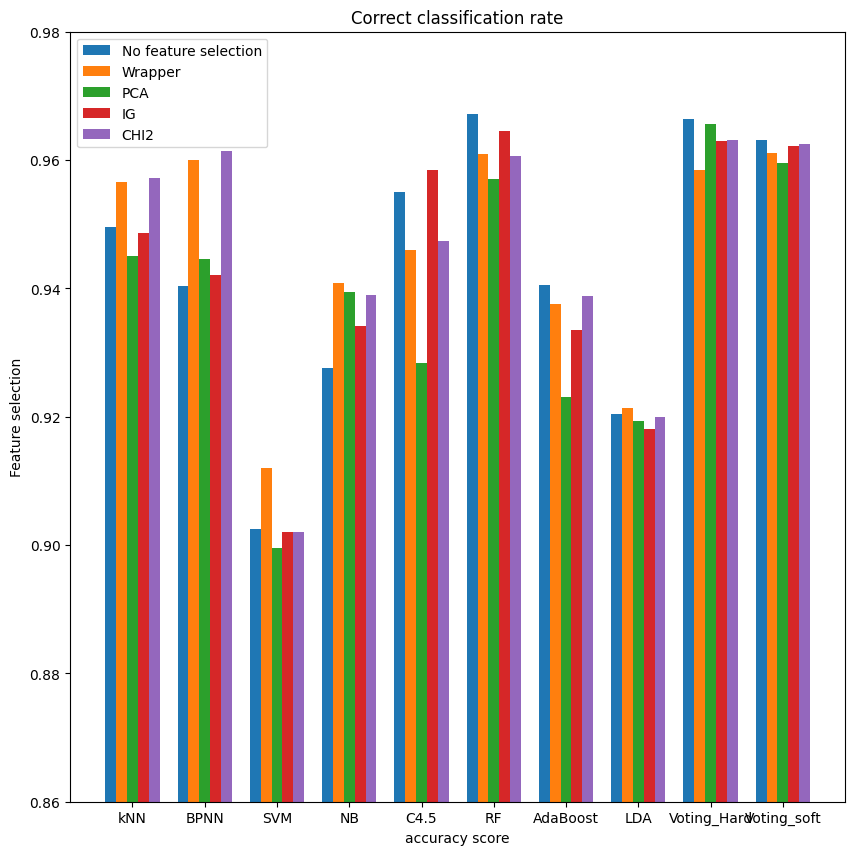

In [13]:
classifiers_names = ['kNN','BPNN','SVM','NB','C4.5','RF', "AdaBoost", "LDA", "Voting_Hard", "Voting_soft"]
X_axis = np.arange(len(classifiers_names))

plt.rcParams["figure.figsize"] = (10,10)

plt.bar(X_axis - 0.30, accuracy_scores_all_features, 0.15, label = 'No feature selection')
plt.bar(X_axis - 0.15, accuracy_scores_sfs, 0.15, label = 'Wrapper')
plt.bar(X_axis + 0.0, accuracy_scores_PCA, 0.15, label = 'PCA')
plt.bar(X_axis + 0.15, accuracy_scores_IG, 0.15, label = 'IG')
plt.bar(X_axis + 0.30, accuracy_scores_chi, 0.15, label = 'CHI2')
  
plt.xticks(X_axis, classifiers_names)
plt.xlabel("accuracy score")
plt.ylabel("Feature selection")
plt.title("Correct classification rate")
plt.legend()
plt.ylim(0.86,0.98)
plt.show()

In [14]:
headers = ['Measures','Without feature selection', 'Wrapper', 'PCA', 'IG', "CHI2"]
idx = list()
for classifier in classifiers_names:
    idx.append(classifier)
    idx.append(classifier)
    idx.append(classifier)
table = []
table.append(headers)
for i in range(0,len(classifiers)):
    for j in range(0,3):
        row = list()
        if j == 0:
            row.append('TPR')
            row.append(TPR_all[i])
            row.append(TPR_sfs[i])
            row.append(TPR_PCA[i])
            row.append(TPR_IG[i])
            row.append(TPR_chi[i])
        if j == 1:
            row.append('TNR')
            row.append(TNR_all[i])
            row.append(TNR_sfs[i])
            row.append(TNR_PCA[i])
            row.append(TNR_IG[i])
            row.append(TNR_chi[i])
        if j == 2:
            row.append('GM')
            row.append(GM_all[i])
            row.append(GM_sfs[i])
            row.append(GM_PCA[i])
            row.append(GM_IG[i])
            row.append(GM_chi[i])
        table.append(row)
print(tabulate(table, headers = "firstrow",showindex = idx))

             Measures      Without feature selection    Wrapper       PCA        IG      CHI2
-----------  ----------  ---------------------------  ---------  --------  --------  --------
kNN          TPR                            0.952983   0.955686  0.947617  0.947595  0.956454
kNN          TNR                            0.945003   0.957799  0.941583  0.950134  0.958356
kNN          GM                             0.948984   0.956742  0.944595  0.948864  0.957404
BPNN         TPR                            0.941915   0.961341  0.945469  0.941062  0.957472
BPNN         TNR                            0.9381     0.958135  0.943406  0.943548  0.966649
BPNN         GM                             0.940006   0.959737  0.944437  0.942304  0.962049
SVM          TPR                            0.918507   0.923874  0.902799  0.919452  0.918441
SVM          TNR                            0.881926   0.896498  0.895135  0.879835  0.881014
SVM          GM                             0.900031   0.910

## Zaključak

ADABoost i LDA klasifikator ne daju nikakva poboljšanja niti su blizu poboljšanju kod predikcije phishing stranica.
Za razliku od ADABoosta i LDA klasifikatora Voting klasifikator (soft i hard) već daje puno bolje rezultate koji su jako blizu poboljšanju.
Kao svoje procijenitelje voting klasifikatori koriste RF, kNN i BPNN pošto su oni zasebno davali najbolje rezultate.
Jedni od razloga zbog kojeg nije došlo do poboljšanja rezultata voting klasifikatora su:
 - Nedovoljna računalna snaga da se obavi opsežan tj. dovoljno dobar grid search nad soft i hard voting klasifikatorima
 - Nasumičnost RF klasifikatora. Kod svakog fit-a RF daje drukčije predikcije
 - Nebalansiran dataset što ne utječe npr. na kNN ali utječe na RF klasifikator.

Za poboljšanja Voting klasifikatora mogli bi se koristiti klasifikatori na koje nebalansiran dataset ne utječe ili
bi se dataset mogao proširiti, eventualno smanjiti kako bi dataset bio balansiran. Također nije napravljen grid search zbog gore navedenog
razloga te bi uz pomoć odabira najboljih hiperparametara voting klasifikator najvjerojatnije bio najbolji. (Ostvaruje skoro pa najbolje rezultate, a nije uopće optimiran)

Također pošto je dataset nebalansiran kao metrika za ocjenjivanja značajki kod wrapper feature selectiona uzet je f1, a ne "najjednostavniji" 
accuracy, jer je više otporan na nebalansirane podatke. Doduše u znanstvenom papiru nigdje nije specificirano koja je metrika uzeta,
no pretpostavljena metrika je accuracy.

Uz sve navedene nove metode koje smo implementirali dodali smo još jedan način odabira značajki a to je: Chi squared (Hi-kvadrat).
Na našim modelima kod kNN-a i BPNN-a daje najbolje rezultate, no ne daje bolje rezultate od modela korištenih u znanstvenom papiru.

Jedno od poboljšanja koje smo dobili je poboljšanje NB klasifikatora i to uz korištenje IG odabira značajki (U papiru je accuracy otp. 93% dok je kod nas skoro pa 95%).
To poboljšanje došlo je zbog opsežnijeg grid search-a.

Za kraj dalo bi se reći kako modeli u znanstvenom papiru već daju jako dobre rezultate (pogotovo BPNN, kNN i RF) te i da dođe do nekakvog unaprijeđenja modela to unaprijeđenje bi bilo minimalno. Također u znanstvenom papiru postoji jako puno nepoznanica kako su pisci došli do rezultata (npr. kod grid-searcha ili sfs-a), te je gotovo pa nemoguće replicirati njihove rezultate, a time i teško raspoznati gdje ima prostora za unaprijeđenjem. Jedan od najvećih faktora za neuspijeh unaprijeđenja rezultata najboljeg modela u znanstvenom papiru je nedovoljna računalna snaga jer da bi se već jako optimirani modeli još bolje optimirali trebate imati jako opsežna pretraživanja hiperparametara/značajki. Naravno cijela stvar se još više zakomplicirava proširivanjem značajki zbog čega ju nismo ni napravili.

<i>Ispod se nalazi kod </i>

## Proširenje značajki polinomijalnim značajkama

In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
y = df.loc[:,"Result"]
X = df.drop(["Result"], axis = 1)
columns_names = X.columns
X = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X, columns = columns_names)
poly = preprocessing.PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split( X_poly, y, test_size=0.4, random_state=42)


In [5]:
def initializePolyClassifiers():
    BPNN = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=100)
    SVM = SVC(probability=True)
    return list([SVM, BPNN])


In [7]:
classifiers = initializePolyClassifiers()

sfs_selected_features = list()

for classifier in classifiers:
    print()
    sfs1 = SFS(classifier, 
            k_features=(29,30), 
            forward=False, 
            floating=False, 
            verbose=1,
            scoring='f1',
            cv=3,
            n_jobs=-1)
    sfs1 = sfs1.fit(X_train, y_train)
    print(classifier.__class__.__name__)
    print(sfs1.k_feature_names_)
    print()
    sfs_selected_features.append(sfs1)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 10.9min


In [ ]:

chi_selected_features = list()

for classifier in classifiers:
    chi1 = SelectKBest(score_func=chi2, k=25)
    chi1 = chi1.fit(X_train, y_train)
    chi_selected_features.append(chi1)

print(chi_selected_features[0].get_feature_names_out())

In [ ]:
accuracy_scores_sfs = list()
TPR_sfs = list()
TNR_sfs = list()
GM_sfs = list()
for idx, sfs_selected_feature in enumerate(sfs_selected_features):
    parameters = grid_search_params[classifiers[idx].__class__.__name__]
    print(classifiers[idx].__class__.__name__)
    grid_search_estimator = GridSearchCV(classifiers[idx], param_grid=parameters, n_jobs=-1)
    grid_search_estimator.fit(X_train, y_train)
    classifiers[idx] = grid_search_estimator.best_estimator_

    X_train_sfs = sfs_selected_feature.transform(X_train)
    X_test_sfs = sfs_selected_feature.transform(X_test)
    classifiers[idx].fit(X_train_sfs,y_train)
    y_pred = classifiers[idx].predict(X_test_sfs)
    accuracy_scores_sfs.append(metrics.accuracy_score(y_test,y_pred))
    TPR_sfs.append(true_positive_rate(y_pred,y_test))
    TNR_sfs.append(true_negative_rate(y_pred,y_test))
    y_pred_proba = classifiers[idx].predict_proba(X_test_sfs)[::,1]


GM_sfs = geometric_mean(TPR_sfs,TNR_sfs)

In [ ]:
accuracy_scores_all_features = list()
TPR_all = list()
TNR_all = list()
GM_all = list()
classifiers_all_features = initializePolyClassifiers()
for idx, classifier in enumerate(classifiers_all_features):
    parameters = grid_search_params[classifiers[idx].__class__.__name__]
    print(classifiers[idx].__class__.__name__)
    grid_search_estimator = GridSearchCV(classifiers[idx], param_grid=parameters, n_jobs=-1)
    grid_search_estimator.fit(X_train, y_train)
    classifiers[idx] = grid_search_estimator.best_estimator_

    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy_scores_all_features.append(metrics.accuracy_score(y_test,y_pred))
    TPR_all.append(true_positive_rate(y_pred,y_test))
    TNR_all.append(true_negative_rate(y_pred,y_test))
    y_pred_proba = classifiers_all_features[idx].predict_proba(X_test)[::,1]
    
GM_all = geometric_mean(TPR_all,TNR_all)

In [ ]:
accuracy_scores_IG = list()
classifiers_IG = initializePolyClassifiers()
TPR_IG = list()
TNR_IG = list()
GM_IG = list()

sel_five_cols = SelectKBest(mutual_info_classif, k=25)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]
X_train_ig = X_train.loc[:, X_train.columns[sel_five_cols.get_support()]]
X_test_ig =X_test.loc[:, X_test.columns[sel_five_cols.get_support()]]
for idx, classifier in enumerate(classifiers_IG):
    parameters = grid_search_params[classifiers[idx].__class__.__name__]
    print(classifiers[idx].__class__.__name__)
    grid_search_estimator = GridSearchCV(classifiers[idx], param_grid=parameters, n_jobs=-1)
    grid_search_estimator.fit(X_train, y_train)
    classifiers[idx] = grid_search_estimator.best_estimator_

    classifier.fit(X_train_ig,y_train)
    y_pred = classifier.predict(X_test_ig)
    accuracy_scores_IG.append(metrics.accuracy_score(y_test,y_pred))
    TPR_IG.append(true_positive_rate(y_pred,y_test))
    TNR_IG.append(true_negative_rate(y_pred,y_test))
    y_pred_proba = classifiers_IG[idx].predict_proba(X_test_ig)[::,1]
    
GM_IG = geometric_mean(TPR_IG,TNR_IG)

In [ ]:

TPR_PCA = list()
TNR_PCA = list()
GM_PCA = list()
accuracy_scores_PCA = list()
classifiers_PCA = initializePolyClassifiers()
pca = PCA(n_components = 25)
pca.fit(X_train)
for idx, classifier in enumerate(classifiers_PCA):
    parameters = grid_search_params[classifiers[idx].__class__.__name__]
    print(classifiers[idx].__class__.__name__)
    grid_search_estimator = GridSearchCV(classifiers[idx], param_grid=parameters, n_jobs=-1)
    grid_search_estimator.fit(X_train, y_train)
    classifiers[idx] = grid_search_estimator.best_estimator_

    classifier.fit(pca.transform(X_train),y_train)
    y_pred = classifier.predict(pca.transform(X_test))
    accuracy_scores_PCA.append(metrics.accuracy_score(y_test,y_pred))
    TPR_PCA.append(true_positive_rate(y_pred,y_test))
    TNR_PCA.append(true_negative_rate(y_pred,y_test))
    y_pred_proba = classifiers_PCA[idx].predict_proba(pca.transform(X_test))[::,1]
    
GM_PCA = geometric_mean(TPR_PCA,TNR_PCA)

In [ ]:
accuracy_scores_chi = list()
TPR_chi = list()
TNR_chi = list()
GM_chi = list()
for idx, chi_selected_feature in enumerate(chi_selected_features):
    parameters = grid_search_params[classifiers[idx].__class__.__name__]
    grid_search_estimator = GridSearchCV(classifiers[idx], param_grid=parameters, n_jobs=-1)
    grid_search_estimator.fit(X_train, y_train)
    classifiers[idx] = grid_search_estimator.best_estimator_

    X_train_chi = chi_selected_feature.transform(X_train)
    X_test_chi = chi_selected_feature.transform(X_test)
    classifiers[idx].fit(X_train_chi,y_train)
    y_pred = classifiers[idx].predict(X_test_chi)
    accuracy_scores_chi.append(metrics.accuracy_score(y_test,y_pred))
    TPR_chi.append(true_positive_rate(y_pred,y_test))
    TNR_chi.append(true_negative_rate(y_pred,y_test))
    y_pred_proba = classifiers[idx].predict_proba(X_test_chi)[::,1]


GM_chi = geometric_mean(TPR_chi,TNR_chi)

In [ ]:
classifiers_names = ['BPNN','SVM']
X_axis = np.arange(len(classifiers_names))

plt.bar(X_axis - 0.30, accuracy_scores_all_features, 0.15, label = 'No feature selection')
plt.bar(X_axis - 0.15, accuracy_scores_sfs, 0.15, label = 'Wrapper')
plt.bar(X_axis + 0.0, accuracy_scores_PCA, 0.15, label = 'PCA')
plt.bar(X_axis + 0.15, accuracy_scores_IG, 0.15, label = 'IG')
plt.bar(X_axis + 0.30, accuracy_scores_chi, 0.15, label = 'CHI2')
  
plt.xticks(X_axis, classifiers_names)
plt.xlabel("accuracy score")
plt.ylabel("Feature selection")
plt.title("Correct classification rate")
plt.legend()
plt.ylim(0.86,0.98)
plt.show()

In [ ]:
headers = ['Measures','Without feature selection', 'Wrapper', 'PCA', 'IG', "CHI2"]
idx = list()
for classifier in classifiers_names:
    idx.append(classifier)
    idx.append(classifier)
    idx.append(classifier)
table = []
table.append(headers)
for i in range(0,len(classifiers)):
    for j in range(0,3):
        row = list()
        if j == 0:
            row.append('TPR')
            row.append(TPR_all[i])
            row.append(TPR_sfs[i])
            row.append(TPR_PCA[i])
            row.append(TPR_IG[i])
            row.append(TPR_chi[i])
        if j == 1:
            row.append('TNR')
            row.append(TNR_all[i])
            row.append(TNR_sfs[i])
            row.append(TNR_PCA[i])
            row.append(TNR_IG[i])
            row.append(TNR_chi[i])
        if j == 2:
            row.append('GM')
            row.append(GM_all[i])
            row.append(GM_sfs[i])
            row.append(GM_PCA[i])
            row.append(GM_IG[i])
            row.append(GM_chi[i])
        table.append(row)
print(tabulate(table, headers = "firstrow",showindex = idx))

## Proširenja

Kao proširenje rada napravili smo sljedeće:

- dodavanje ADABoost klasifikatora
- dodavanje LDA klasifikatora
- klasifikator baziran na glasanju
- promjenjena metrika za odabir značajki iz "accuracy" u "f1-score" zbog veće otpornosti na nebalansirane skupove podataka.
- dodano izlučivanje značajki primjenom hi kvadrat metode


## Ograničenja

- Računalna snaga. Zbog male računalne snage nismo bili u stanju provesti opsežniji grid search u potrazi za optimalnim rezultatima. Grid search je bio primjenjen samo prlikom treniranja modela sa značajkama dobivenima postupcima omotača.